<a href="https://colab.research.google.com/github/AdityaDhiman05/UPI-Analytics-Dashboard/blob/main/DAY_10_CAPSTONE_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



 **Day 10** of the UPI Analytics Dashboard Capstone Project!

In this final phase, we will:
- Load the best-performing Random Forest model saved on Day 9.
- Visualize predicted vs. actual UPI transaction values.
- Derive and document key learnings and insights.
- Prepare the project for deployment and final reporting.


In [ ]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


Load Saved Model and Test Data

In [5]:
from google.colab import files
uploaded = files.upload()

best_model = joblib.load("best_random_forest_model.pkl")
uploaded = files.upload()
test_df = pd.read_csv("upi_test_prepared.csv")

X_test = test_df[["Banks_Live_Scaled"]]
y_test = test_df["Volume_Mn"]

test_df.head()


Saving best_random_forest_model.pkl to best_random_forest_model (1).pkl


Saving upi_test_prepared.csv to upi_test_prepared.csv


,Banks_Live_Scaled,Volume_Mn
0,0.502821,7829.49
1,-1.222456,0.09
2,-0.648957,918.35
3,0.096592,4617.15
4,-1.112535,4.38


 Generate Predictions on Test Data

In [6]:
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("📊 Final Model Evaluation:")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R² Score : {r2:.4f}")


📊 Final Model Evaluation:
MAE  : 266.90
RMSE : 396.59
R² Score : 0.9951


Visualize Predicted vs Actual

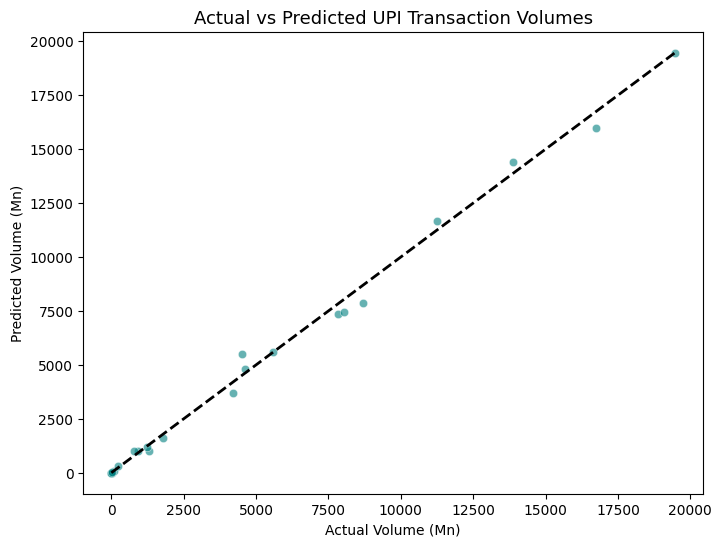

In [7]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, color='teal', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title("Actual vs Predicted UPI Transaction Volumes", fontsize=13)
plt.xlabel("Actual Volume (Mn)")
plt.ylabel("Predicted Volume (Mn)")
plt.show()


Feature Importance Analysis

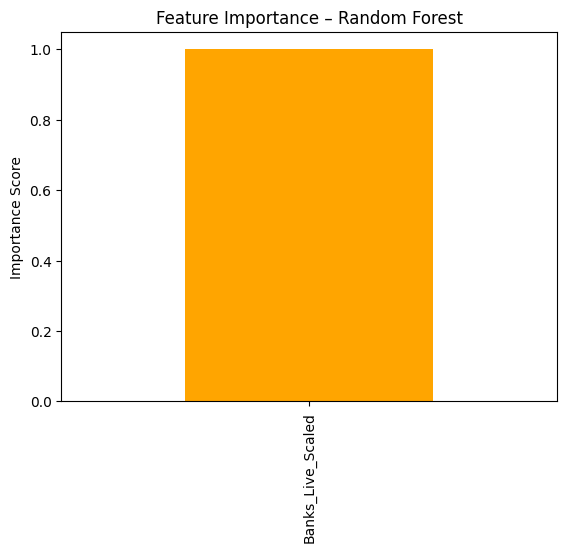

In [8]:
feature_importance = pd.Series(best_model.feature_importances_, index=X_test.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title("Feature Importance – Random Forest")
plt.ylabel("Importance Score")
plt.show()


In [9]:
results_df = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})

results_df.to_csv("final_predictions.csv", index=False)
print("✅ Final predictions saved as 'final_predictions.csv'")


✅ Final predictions saved as 'final_predictions.csv'
